In [91]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [92]:
data_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_dataset = data_gen.flow_from_directory(
    'data/train',
    target_size=(200, 200),
    batch_size=20,
    shuffle=True,
    class_mode='binary',
)

Found 800 images belonging to 2 classes.


In [93]:
test_dataset = data_gen.flow_from_directory(
    'data/test',
    target_size=(200, 200),
    batch_size=20,
    shuffle=False,
    class_mode='binary',
)

Found 201 images belonging to 2 classes.


In [94]:
train_dataset.class_indices, train_dataset.image_shape

({'curly': 0, 'straight': 1}, (200, 200, 3))

In [95]:
input_layer = keras.layers.Input(shape=(200, 200, 3))
conv_layer = keras.layers.Conv2D(32, kernel_size=3, activation='relu')(input_layer)
max_pooling_layer = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv_layer)
flatten_layer = keras.layers.Flatten()(max_pooling_layer)
dense_layer = keras.layers.Dense(64, activation='relu')(flatten_layer)
output_layer = keras.layers.Dense(1, activation='sigmoid')(dense_layer)
model = keras.Model(input_layer, output_layer)

In [96]:
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [97]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

/Users/karpenkoanton/machine-learning-zoomcamp-homework/mlz-hw/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 678ms/step - accuracy: 0.5039 - loss: 0.7795 - val_accuracy: 0.6169 - val_loss: 0.6663
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 592ms/step - accuracy: 0.6481 - loss: 0.6332 - val_accuracy: 0.6318 - val_loss: 0.6290
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 556ms/step - accuracy: 0.6439 - loss: 0.6049 - val_accuracy: 0.5871 - val_loss: 0.6805
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 559ms/step - accuracy: 0.6773 - loss: 0.6054 - val_accuracy: 0.6219 - val_loss: 0.6437
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 554ms/step - accuracy: 0.6755 - loss: 0.5938 - val_accuracy: 0.6219 - val_loss: 0.6622
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 551ms/step - accuracy: 0.6981 - loss: 0.5747 - val_accuracy: 0.6517 - val_loss: 0.6086
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 558ms/step - accuracy: 0.6892 - loss: 0.5484 - val_accuracy: 0.6418 - val_loss: 0.6240
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 586ms/step - accuracy: 0.7546 - loss: 0.5233 - val_accu

In [99]:
import numpy as np
np.median(history.history['accuracy']), np.std(history.history['loss'])

(0.695624977350235, 0.06643952934538291)

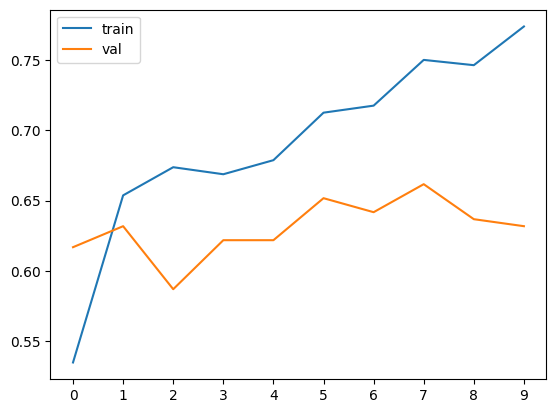

In [100]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [101]:
data_gen_aug = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_dataset_aug = data_gen_aug.flow_from_directory(
    'data/train',
    target_size=(200, 200),
    batch_size=20,
    shuffle=True,
    class_mode='binary',
)

Found 800 images belonging to 2 classes.


In [102]:
history_aug = model.fit(train_dataset_aug, epochs=10, validation_data=test_dataset)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 948ms/step - accuracy: 0.6523 - loss: 0.6239 - val_accuracy: 0.6816 - val_loss: 0.5885
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6353 - loss: 0.6181 - val_accuracy: 0.7065 - val_loss: 0.5823
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 37s 927ms/step - accuracy: 0.7012 - loss: 0.5956 - val_accuracy: 0.6965 - val_loss: 0.5752
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 746ms/step - accuracy: 0.6809 - loss: 0.5930 - val_accuracy: 0.6965 - val_loss: 0.5805
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 738ms/step - accuracy: 0.7039 - loss: 0.5818 - val_accuracy: 0.6965 - val_loss: 0.5728
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 743ms/step - accuracy: 0.6828 - loss: 0.5986 - val_accuracy: 0.7015 - val_loss: 0.5701
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 776ms/step - accuracy: 0.7025 - loss: 0.5743 - val_accuracy: 0.7015 - val_loss: 0.5714
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 799ms/step - accuracy: 0.7045 - loss: 0.5835 - val_accurac

In [103]:
history_aug.history

{'accuracy': [0.6324999928474426,
  0.6399999856948853,
  0.6825000047683716,
  0.6700000166893005,
  0.699999988079071,
  0.6987500190734863,
  0.7012500166893005,
  0.6887500286102295,
  0.6987500190734863,
  0.6825000047683716],
 'loss': [0.633904755115509,
  0.6189114451408386,
  0.6107845902442932,
  0.6027527451515198,
  0.5792904496192932,
  0.5853931903839111,
  0.5814424753189087,
  0.5928887724876404,
  0.5786005258560181,
  0.5820448398590088],
 'val_accuracy': [0.6815920472145081,
  0.7064676880836487,
  0.6965174078941345,
  0.6965174078941345,
  0.6965174078941345,
  0.7014925479888916,
  0.7014925479888916,
  0.711442768573761,
  0.711442768573761,
  0.7164179086685181],
 'val_loss': [0.5884814858436584,
  0.5823262333869934,
  0.5751718282699585,
  0.5805395841598511,
  0.5728042125701904,
  0.5701150298118591,
  0.571418046951294,
  0.5596358776092529,
  0.5561825633049011,
  0.5493554472923279]}

In [104]:
# Combine the histories
combined_history = {}
for key in history.history.keys():
    combined_history[key] = history.history[key] + history_aug.history[key]

# Example of how to access the combined history
print(combined_history['loss'])
print(combined_history['accuracy'])

[0.7288464307785034, 0.6176931858062744, 0.5865039229393005, 0.5920809507369995, 0.5875040292739868, 0.557607114315033, 0.534527063369751, 0.5116668343544006, 0.5129412412643433, 0.4833128750324249, 0.633904755115509, 0.6189114451408386, 0.6107845902442932, 0.6027527451515198, 0.5792904496192932, 0.5853931903839111, 0.5814424753189087, 0.5928887724876404, 0.5786005258560181, 0.5820448398590088]
[0.5350000262260437, 0.6537500023841858, 0.6737499833106995, 0.668749988079071, 0.6787499785423279, 0.7124999761581421, 0.7174999713897705, 0.75, 0.7462499737739563, 0.7737500071525574, 0.6324999928474426, 0.6399999856948853, 0.6825000047683716, 0.6700000166893005, 0.699999988079071, 0.6987500190734863, 0.7012500166893005, 0.6887500286102295, 0.6987500190734863, 0.6825000047683716]


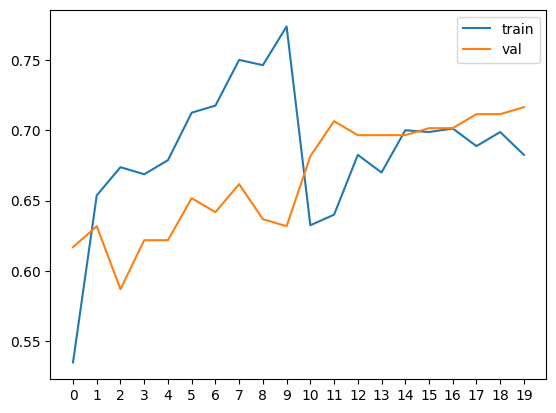

In [107]:
plt.plot(combined_history['accuracy'], label='train')
plt.plot(combined_history['val_accuracy'], label='val')
plt.xticks(np.arange(20))
plt.legend()

In [110]:
np.mean(combined_history['val_loss']), np.average(history_aug.history['val_accuracy'])

(0.6028749912977218, 0.7019900500774383)